In [133]:
##Question 1: write code to show effects of interactions, if any, on the linear regression model 
##to predict the total_sales for a new area using given sales from three areas.
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
data1 = pd.read_csv('sales.csv') ##Reading the data

In [87]:
data1.head() ##Printing first 5 rows of the data to look at its structure

,Unnamed: 0,area1_sales,area2_sales,area3_sales,total_sales
0,1000,0.79,0.80,0.02,1.75
1,1001,0.83,0.08,0.18,1.75
2,1002,0.85,0.01,0.22,1.75
3,1003,1.25,0.00,0.03,1.75
4,1004,0.72,0.04,0.10,1.74


In [88]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3000 non-null   int64  
 1   area1_sales  3000 non-null   float64
 2   area2_sales  3000 non-null   float64
 3   area3_sales  3000 non-null   float64
 4   total_sales  3000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 117.3 KB


In [89]:
data1.isnull().sum() ##No Null values in the data

Unnamed: 0     0
area1_sales    0
area2_sales    0
area3_sales    0
total_sales    0
dtype: int64

In [122]:
x1 = data1[['area1_sales', 'area2_sales', 'area3_sales']]
y1 = data1['total_sales']

In [123]:
##Splitting the data into train and test
x1_train , x1_test , y1_train , y1_test = train_test_split(x1, y1, test_size= 0.25 , random_state=0)

In [124]:
##Linear Regression without interaction terms using statsmodel library
import statsmodels.api as sm
x1_train = sm.add_constant(x1_train) ##Because statsmodel by default creates interceptless model, this line of code adds intercept
model1 = sm.OLS(y1_train, x1_train).fit() ##Using ols function of statsmodel to fit linear regression. The .fit() function fits linear regression line using train dataset
print(model1.summary()) ##print model summary. The fitted linear model/equation is stored in 'model1' variable. summary() function shows the details of the model

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     1758.
Date:                Sat, 21 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:55:48   Log-Likelihood:                 554.14
No. Observations:                2250   AIC:                            -1100.
Df Residuals:                    2246   BIC:                            -1077.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2524      0.010     25.771      

In [129]:
##Predicting the target variable in test dataset
x1_1_test = sm.add_constant(x1_test)
predictions = model1.predict(x1_1_test)

##Finding out prediction errors
##Formula: SSE = sum((y-pred_y)^2)
predictions_error = y1_test - predictions
predictions_error = predictions_error.to_numpy()
predictions_error = predictions_error**2
sum(predictions_error)

25.3720205223684

##Model without interaction: total_sales = 0.25+0.91*area1_sales+0.75*area2_sales+1.78*area3_sales

In [95]:
##Linear Regression with interaction terms using statsmodel library
##Assigning variables
data_train = pd.concat([x1_train, y1_train], axis=1)
area1 = x1_train['area1_sales']
area2 = x1_train['area2_sales']
area3 = x1_train['area3_sales']
data_test = pd.concat([x1_test, y1_test], axis=1)
area1test = x1_test['area1_sales']
area2test = x1_test['area2_sales']
area3test = x1_test['area3_sales']

In [96]:
##Adding interaction terms to the train & test dataset
x1_train['interaction1'] = area1*area2
x1_train['interaction2'] = area3*area2
x1_train['interaction3'] = area1*area3

x1_test['interaction1'] = area1test*area2test
x1_test['interaction2'] = area3test*area2test
x1_test['interaction3'] = area1test*area3test

In [97]:
import statsmodels.api as sm
x1_2_train = sm.add_constant(x1_train)##Because statsmodel by default creates interceptless model, this line of code adds intercept
model1_2 = sm.OLS(y1_train, x1_2_train).fit()
print(model1_2.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     918.6
Date:                Sat, 21 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:46:56   Log-Likelihood:                 590.05
No. Observations:                2250   AIC:                            -1166.
Df Residuals:                    2243   BIC:                            -1126.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3015      0.012     25.724   

In [115]:
##Predicting the target variable in test dataset
x1_2_test = sm.add_constant(x1_test)
predictions2 = model1_2.predict(x1_2_test)

##Finding out prediction errors
##Formula: SSE = sum((y-pred_y)^2)
predictions2_error = y1_test - predictions2
predictions2_error = predictions2_error.to_numpy()
predictions2_error = predictions2_error**2
sum(predictions2_error)

/Users/sheetalrajgure/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


23.619324138166384

##Interpretation: Interaction terms are significant, adj r2 increases only by 1%. SSE is decreasing
##Adding multiplicative terms i.e. interactions is decreasing the prediction error / SSE i.e. it makes the model better
##We can say that the sales in area1 interacts with sales in area 2 to give combined effect on target variable

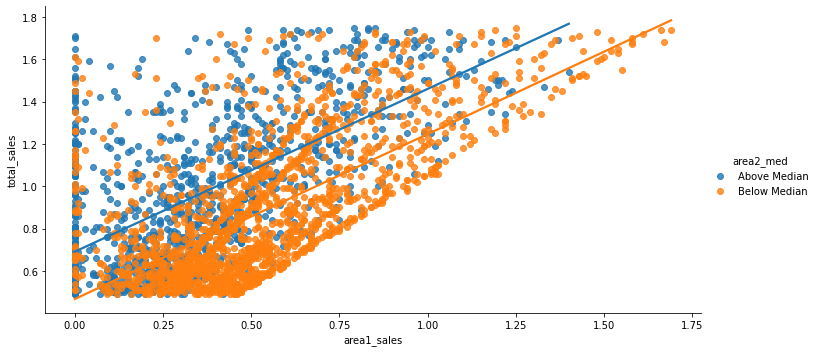

In [134]:
#Interaction Plots area1 with area2
data1['area2_med'] = data1.area2_sales > data1.area2_sales.median()
data1['area2_med'] = np.where(data1.area2_med == False, "Below Median", "Above Median")
sns.lmplot(x='area1_sales', y='total_sales', hue='area2_med', data=data1, ci=None, height=5, aspect=2);

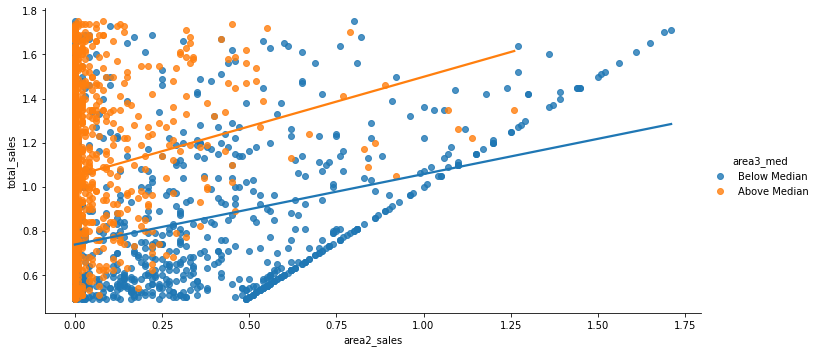

In [135]:
#Interaction Plots area2 with area3
data1['area3_med'] = data1.area3_sales > data1.area3_sales.median()
data1['area3_med'] = np.where(data1.area3_med == False, "Below Median", "Above Median")
sns.lmplot(x='area2_sales', y='total_sales', hue='area3_med', data=data1, ci=None, height=5, aspect=2)

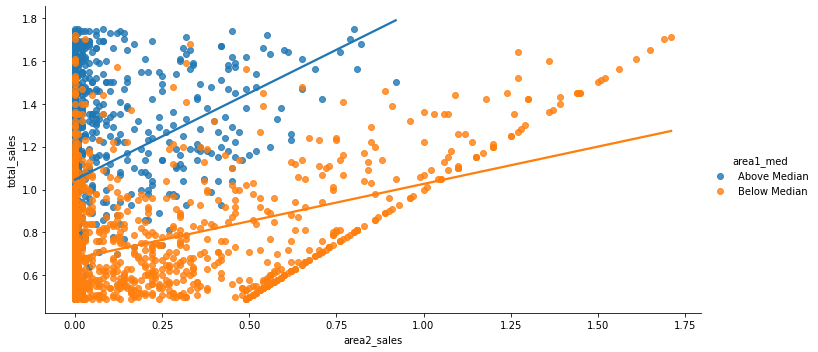

In [136]:
data1['area1_med'] = data1.area1_sales > data1.area1_sales.median()
data1['area1_med'] = np.where(data1.area1_med == False, "Below Median", "Above Median")
sns.lmplot(x='area2_sales', y='total_sales', hue='area1_med', data=data1, ci=None, height=5, aspect=2)

In [145]:
##Question 2 Develop a full Logistic Regression Model using customer.csv to predict whether 
##the customer will purchase the product. Also train trimmed logistic regression models (Trimmed over features in the data). 
##Compute the "in-sample R2" (pseudo) for the models you train and compare the models based on this metric.
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [146]:
data2 = pd.read_csv('customer.csv')
data2.isnull().sum() ##There are no null values in the data

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [147]:
data2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


##Dependent/Target Variable -> 'Purchased' 0 or 1
##Independent Variables: Est Salary and Age are numerical while gender is categorical

In [149]:
num_1s = sum(data2["Purchased"]==1)
num_0s = sum(data2["Purchased"]==0)
print("No of 1s in Purchased:", num_1s)
print("No of 0s in Purchased:", num_0s)

No of 1s in Purchased: 143
No of 0s in Purchased: 257


In [150]:
##Part A: Full logistic model
##Define Dummy Variable for Gender
data2 = pd.get_dummies(data2, columns=['Gender'], drop_first=True) ##Gender Male:1, Gender Female:0
data2

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [151]:
## Defining independent and target variables
X2 = data2[['Age', 'EstimatedSalary', 'Gender_Male']]
Y2 = data2.iloc[:, data2.columns == 'Purchased']

In [143]:
##Logistic Regression - Full Model using statsmodels

In [159]:
import statsmodels.api as sm
X2 = sm.add_constant(X2) ##Constant for Intercept term
logit_model=sm.Logit(Y2,X2)
result2=logit_model.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.344804
         Iterations 8
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.471     
Dependent Variable:  Purchased        AIC:              283.8432  
Date:                2023-01-21 21:51 BIC:              299.8091  
No. Observations:    400              Log-Likelihood:   -137.92   
Df Model:            3                LL-Null:          -260.79   
Df Residuals:        396              LLR p-value:      5.4877e-53
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      8.0000                                       
------------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
------------------------------------------------------------------
const           -12.7836   1.3592 -9.4049 0.0000 -15.4477 -10.1196
Age               0.2370   0.0264  8.9839 0.0000   0.

/Users/sheetalrajgure/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


pandas.core.frame.DataFrame

In [153]:
print("Pseudo R-squared for full model is: 0.471")

Pseudo R-squared for full model is: 0.471


##Trimmed Model 1
##First trimming gender because the p-value for gender coefficient is not significant, 
##that means keeping everything else constant, purchase probability, is not significantly different for males & females

In [155]:
X_trim1 = data2[['Age', 'EstimatedSalary']]
X_trim1 = sm.add_constant(X_trim1) ##Constant for Intercept term
logit_model2=sm.Logit(Y2,X_trim1)
result3=logit_model2.fit()
print(result3.summary2())

Optimization terminated successfully.
         Current function value: 0.346314
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.469     
Dependent Variable: Purchased        AIC:              283.0514  
Date:               2023-01-21 21:40 BIC:              295.0258  
No. Observations:   400              Log-Likelihood:   -138.53   
Df Model:           2                LL-Null:          -260.79   
Df Residuals:       397              LLR p-value:      7.9949e-54
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------
const           -12.4340   1.2998 -9.5662 0.0000 -14.9815 -9.8865
Age               0.2335   0.0259  9.0128 0.0000   0.1827  0.2843


/Users/sheetalrajgure/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [156]:
print("Pseudo R-squared for trimmed model 1 (faetures: age and estimated salary) is: 0.469")

Pseudo R-squared for trimmed model 1 (faetures: age and estimated salary) is: 0.469


In [157]:
##Trimmed Model 2
##Trimming Age 
X_trim2 = data2[['EstimatedSalary']]
X_trim2 = sm.add_constant(X_trim2) ##Constant for Intercept term
logit_model3=sm.Logit(Y2,X_trim2)
result3=logit_model3.fit()
print(result3.summary())

Optimization terminated successfully.
         Current function value: 0.584658
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 Jan 2023   Pseudo R-squ.:                  0.1032
Time:                        21:41:59   Log-Likelihood:                -233.86
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 2.168e-13
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.3227      0.286     -8.134      0.000      -2.882      -1.763
EstimatedSalar

/Users/sheetalrajgure/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print("Pseudo R-squared for trimmed model 2 (features: only estimated salary) is: 0.103. This model doesn't make sense")

In [158]:
##Trimmed Model 3
##Keeping only Age 
X_trim3 = data2[['Age']]
X_trim3 = sm.add_constant(X_trim3) ##Constant for Intercept term
logit_model4=sm.Logit(Y2,X_trim3)
result4=logit_model4.fit()
print(result4.summary())

Optimization terminated successfully.
         Current function value: 0.420327
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 Jan 2023   Pseudo R-squ.:                  0.3553
Time:                        21:43:46   Log-Likelihood:                -168.13
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 3.356e-42
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.0441      0.784    -10.258      0.000      -9.581      -6.507
Age            0.1889      0.

/Users/sheetalrajgure/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print("Pseudo R-squared for trimmed model 3 (features: only age) is: 0.355")

In [161]:
##Trimmed Model 4
##Keeping only Gender
X_trim4 = data2[['Gender_Male']]
X_trim4 = sm.add_constant(X_trim4) ##Constant for Intercept term
logit_model5=sm.Logit(Y2,X_trim4)
result5=logit_model5.fit()
print(result5.summary())

Optimization terminated successfully.
         Current function value: 0.651064
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 Jan 2023   Pseudo R-squ.:                0.001384
Time:                        21:51:58   Log-Likelihood:                -260.43
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                    0.3955
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5004      0.144     -3.464      0.001      -0.783      -0.217
Gender_Male    -0.1775    

In [ ]:
print("Pseudo R-squared for trimmed model 4 (features: only Gender) is: 0.001") #Not a significant feature

In [166]:
result2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.471     
Dependent Variable:  Purchased        AIC:              283.8432  
Date:                2023-01-21 22:48 BIC:              299.8091  
No. Observations:    400              Log-Likelihood:   -137.92   
Df Model:            3                LL-Null:          -260.79   
Df Residuals:        396              LLR p-value:      5.4877e-53
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      8.0000                                       
------------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
------------------------------------------------------------------
const           -12.7836   1.3592 -9.4049 0.0000 -15.4477 -10.1196
Age               0.2370   0.0264  8.9839 0.0000   0.1853   0.2887
EstimatedSalary   0.0000   0.0000  6.6585 0.0000   0.0000   0.0000
Gender_Male       0.3338   0.3052  1.0938 0.2741  -0.2644   0.9321
==================================================================

"""

In [180]:
import math
math.exp(0.3338)##Coefficient of gender
math.exp(0.237)##Coefficient of age
math.exp(0.00005)##Coefficient of estimated salary

1.0000500012500209

#Question 3: For the Logistic Regression models trained above, pick the best model wrt to the in-sample R2 
##and give your interpretation of the model’s coefficients
##Logistic regression's right hand side is log(odds ratio)
##Select the full Model with all features as its pseudo R-2 is the highest
##Interpretation of coefficients:
##1. The odds of purchase increases if the gender is Male (Males are more likely to purchase than females)controlling for age & estimated salary.
##For Male category odds of purchase is 39.6% more than females keeping estimated salary and age constant: e^0.3338 = 1.396. Males multiply by 1.396 the odds ratio of purchasing compared to females.
##2. The odds of purchase increases with Age, in particular, the odds of purchase increases 26.7% when age increases by 1 unit keeping estimated salary and gender constatnt
##e^0.237 = 1.267. An increase in 1 year of Age multiply by 1.273 the odds ratio of purchasing keeping other predictors constant
##3. The odds of purchase increases with EstimatedSalary, in particular, the odds of purchase increases 0.005% when EstimatedSalary increases by 1 dollar keeping age and gender constatnt
##e^0.00005 = 1.00005. An increase in 1$ of EstimatedSalary multiply by 1.00005 the odds ratio of purchasing keeping other predictors constant


In [ ]:
#Question 4: Is accuracy a good metric to judge the above model? Give reasons and alternatives to support your answer.

In [210]:
##Lets calculate accuracy
pred_prob = result2.predict(X2)

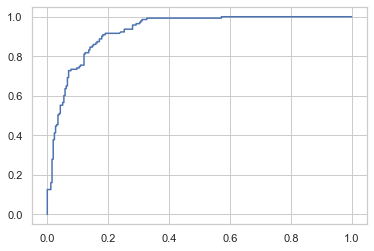

In [211]:
##ROC Curve to find optimum threshold to optimize false negatives and false positives
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y2, pred_prob)
plt.plot(fpr,tpr)
##Threshold from ROC Curve = 0.8

In [212]:
def probs_to_prediction(probs, threshold):
    pred=[]
    for x in probs:
        if x>threshold:
            pred.append(1)
        else:
            pred.append(0)
    return pred

predicted_class =probs_to_prediction(pred_prob, 0.8)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y2,predicted_class)
print(confusion_matrix)

[[248   9]
 [ 77  66]]


In [219]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)
accuracy_score(Y2,predicted_class)
##78.5% accuracy

0.785

##Accuracy is a good metric when the target class is well balanced but is not a good choice with unbalanced classes.
##Here the Purchased column is almost 40-60% split, hence accuracy is a decent measure
##Here for in sample, accuracy is 78.5% which is good but we cannot extend this result for certain out of sample 
##So out of sample accuracy would be a good measure
##Alternative metrics are balanced accuracy, precision, recall and f1-score

/Users/sheetalrajgure/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.344804
         Iterations 8


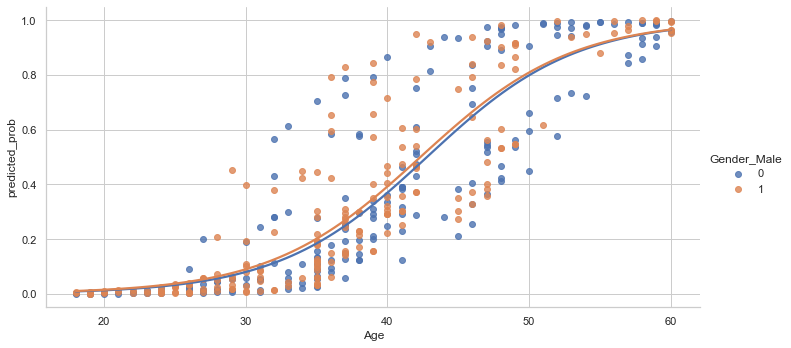

In [215]:
#Question5: Plot the interactions of the ‘Age’ and ‘Gender’ features with the ‘Purchased’ output.
X2 = sm.add_constant(X2) ##Constant for Intercept term
logit_model=sm.Logit(Y2,X2)
result2=logit_model.fit()
predicted_prob = result2.predict(X2)
data2['predicted_prob'] = predicted_prob
sns.lmplot(x='Age', y='predicted_prob', hue='Gender_Male', data=data2,logistic=True, ci=None, height=5, aspect=2)


##From the graph, gender plots do not seem to be interacting, gender Male has higher probability of purchace for all ages (irrespective of age). But the difference is not that significant as seen from the regression results above

##Question6: The following plots show effect of Income and Change in savings on Likelihood of buying a house. 
##Observe the three plots (a, b, c) shown and answer the following questions for each plot:

##For plot (a), the regression equation should include interaction term (interaction between Income and Average
##Savings) because the slopes of high, medium and low income lines is different which means interaction is significant (multiplicative term needs to be added depicting the difference in the slopes)
##For plot (b), the regression equation should include interaction term (interaction between Income and Average
##Savings) because the slopes of high and low income lines is different which means interaction is significant (multiplicative term needs to be added depicting the difference in the slopes)
##Low savings, low income people are less likely to buy than the low savings, high income people whereas as savings goes up futher low income people's likelihood to buy house increases but for high income it decreases
##For plot (c), the regression equation should not include interaction term (interaction between Income and Average
##Savings). The slope for both the low and high income people is same with resective to savings